<a href="https://colab.research.google.com/github/ericfruchi/portifolio/blob/master/Analisando_os_Dados_do_Airbnb_Amsterd%C3%A3_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Estudo de caso 1 - SIGMOIDAL**
*by [Eric Fruchi](https://medium.com/@ericfruchi)*

# Análise dos Dados do Airbnb - *Amsterdã*

O [Airbnb](https://www.airbnb.com.br/) atualmente considerada a **maior empresa hoteleira de todo o mundo, sem ao menos possuir um hotel.**

Conecta pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<img alt="Analisando Airbnb" width="15%" src="http://vempraver.com.br/wp-content/uploads/2019/09/airbnb-logo-transparente-vempraver-1024x459.jpg">


## Amsterdã - Cidade da Holanda (Países Baixos)
E a cidade escolhida é Amsterdã, essa localizada nos países baixos da europa, muito procurada por turistas de todo o mundo para conhecer sua cultura, culinária, seu elaborado sistema de canais e também sua maravilhosa arquitetura, muitos de seus prédios e casas são do século XVII e isso atraí a curiosidade de muitos turistas. 

Neste *notebook*, iremos analisar os dados referentes à esta cidade e ver quais insights podem ser extraídos a partir de dados brutos, informar o leitor de qual o melhor bairro para se alugar, qual o valor mais em conta, qual a disponibilidade de casas, hotéis ou apartamentos.

Vamos lá!!!

<img alt="amsterdã cover" width="800" height="400"  src="https://image.freepik.com/free-photo/facades-amsterdam-windows_1321-1652.jpg">

## Obtenção dos Dados
Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise inicial, será usado o seguinte arquivo:

* listings.csv - Summary information and metrics for listings in Amsterdam (good for visualisations).

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-08-06/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma cenário inicial e permitir um entendimento de como os dados estão devidamente estruturados.

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada 
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - o grupo de bairro foi geocodificado usando a latitude e longitude
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias
* number_of_reviews_ltm - Número de reviews da lista nos últimos 12 meses
* license - Número de licença

Antes de iniciar qualquer análise, vamos visualizar nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# exibir as 5 primeiras entradas:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,279,2019-11-21,2.88,1,132,1,0363 5F3A 5684 6750 D14D
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36509,4.89354,Private room,106,1,339,2020-03-27,3.68,2,0,0,0363 CBB3 2C10 0C2A 1E29
2,25428,"Lovely, sunny 1 bed apt in Ctr (w.lift) & firepl.",56142,Joan,NaN,Centrum-West,52.37297,4.88339,Entire home/apt,100,14,5,2020-01-02,0.12,1,57,0,NaN
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,135,2,221,2020-07-25,2.14,1,182,2,0363 974D 4986 7411 88D8
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-Oost,52.36610,4.88953,Private room,75,2,343,2020-02-06,4.53,2,295,10,0363 607B EA74 0BD8 2F6F


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa no arquivo chamado: listings.csv.gz.

Aqui identificamos que nosso arquivo possui **16478 entradas(linhas)** e **18 colunas**.

In [4]:
# tamanho do nosso dataframe
df.shape

(16478, 18)

In [5]:
# identificar o volume de dados do DataFrame:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# exibir os tipos de entradas do dataset:
print(df.dtypes)

Entradas:	 16478
Variáveis:	 18

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` também possuem alguns valores nulos.
* As variáveis `name` e `host_name` tem seus valores nulos em menor quantidade.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.749059
reviews_per_month                 0.137092
last_review                       0.137092
host_name                         0.003338
name                              0.001881
longitude                         0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64


### **Q3. Qual o tipo de distribuição das variáveis?** 

Identificado as variáveis com valores nulos, vamos identificar a distribuição das variáveis, plotaremos um histograma, com ele poderemos identificar possíveis outliers, também conhecido por "Valores Discrepantes".


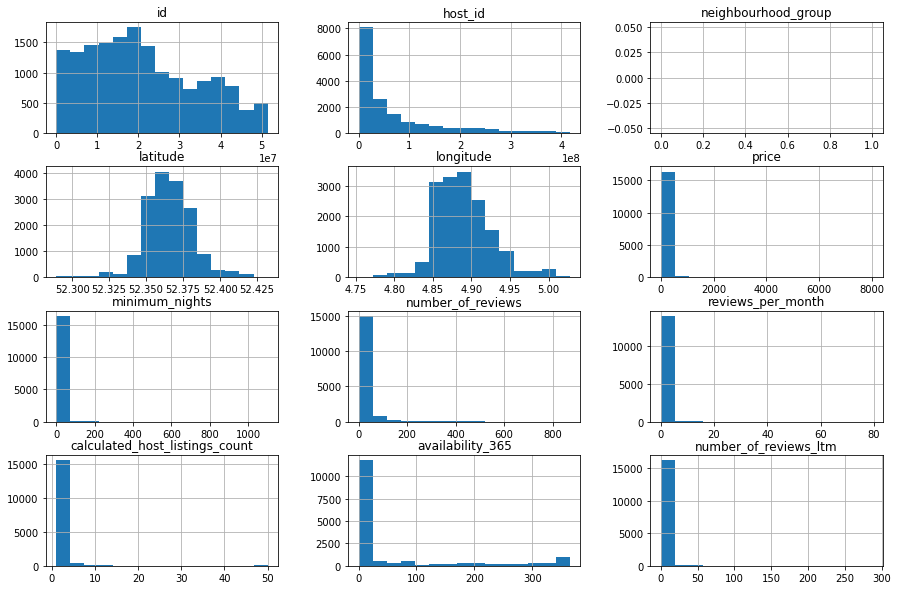

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

#### **Q3.1 Há Outliers presentes?** 

Pela distribuição do histograma, é possível verificar que além da variável `neighbourhood_group`indícios da presença de outliers. Olhe por exemplo as variáveis `price`, `reviews_per_month`, `number_of_reviews`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem não só toda a representação gráfica, como também a visualização ideal do resultado da pesquisa. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar *boxplots* para a variável que apresenta distorções na distribuição.

Aqui vamos utilizar o método `describe()`

In [8]:
# ver o resumo estatítisco das variáveis numéricas através do método "describe()"
df[['price','reviews_per_month','number_of_reviews','minimum_nights','calculated_host_listings_count']].describe()

,price,reviews_per_month,number_of_reviews,minimum_nights,calculated_host_listings_count
count,16478.000000,14219.000000,16478.000000,16478.000000,16478.000000
mean,156.873225,0.636915,24.295181,3.934337,1.768418
std,173.111294,1.410119,56.040299,19.445875,3.544618
min,0.000000,0.010000,0.000000,1.000000,1.000000
25%,96.000000,0.110000,2.000000,2.000000,1.000000
50%,130.000000,0.270000,8.000000,2.000000,1.000000
75%,180.000000,0.610000,21.000000,3.000000,1.000000
max,8000.000000,79.290000,871.000000,1100.000000,50.000000


Olhando o resumo estatístico acima, podemos confirmar algumas estimativas como:

* A variável `price` possui 75% do seu valor em 180,000000, porém seu valor máximo é 8000.000000, vemos uma discrepância muito grande aqui.

* A variável `reviews_per_month` tem como quantidade máxima o valor de 79.2, enquanto 75% da quantidade apresenta o valor de 0.6, também temos um outlier aqui.

*  A variável `number_of_reviews` também apresenta uma quantidade máxima muito maior em relação ao que apresenta na quantidade de 75%.

* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias, sua quantidade máxima apresenta o valor de 1100 dias, totalmente fora do padrão para quem usa o Airbnb.

* E por final, `calculated_host_listings_count`, assim como os demais, também apresenta valores discrepantes obsevando seu valor máximo com relação aos outros valores.

Visualizando os histogramas e executando o método `describe()` identificamos outliers presentes. Para tratá-los vamos seguir os passos seguintes:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.




In [9]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


IQR da variável price:  84.0
Limite superior de price:  306.0
Limite inferior de price:  -30.0


Temos um limite superior para variável `price`, que é 306.0, todo número superior a isso é um outlier e precisa ser removido. 

In [10]:
# identificando os outliers para a variável reviews_per_month
q1_reviews_per_month = df.reviews_per_month.quantile(.25)
q3_reviews_per_month = df.reviews_per_month.quantile(.75)
IQR_reviews_per_month = q3_reviews_per_month - q1_reviews_per_month
print('IQR da variável reviews_per_month: ', IQR_reviews_per_month)

# definindo os limites                                       
sup_reviews_per_month = q3_reviews_per_month + 1.5 * IQR_reviews_per_month
inf_reviews_per_month = q1_reviews_per_month - 1.5 * IQR_reviews_per_month

print('Limite superior de reviews_per_month: ', sup_reviews_per_month)
print('Limite inferior de reviews_per_month: ', inf_reviews_per_month)


IQR da variável reviews_per_month:  0.5
Limite superior de reviews_per_month:  1.3599999999999999
Limite inferior de reviews_per_month:  -0.64


O limite superior de `reviews_per_month` é de 1.35, tudo que for acima de disso precisa ser removido.

In [11]:
# identificando os outliers para a variável number_of_reviews
q1_number_of_reviews = df.number_of_reviews.quantile(.25)
q3_number_of_reviews = df.number_of_reviews.quantile(.75)
IQR_number_of_reviews = q3_number_of_reviews - q1_number_of_reviews
print('IQR da variável number_of_reviews: ', IQR_number_of_reviews)

# definindo os limites                                       
sup_number_of_reviews = q3_number_of_reviews + 1.5 * IQR_number_of_reviews
inf_number_of_reviews = q1_number_of_reviews - 1.5 * IQR_number_of_reviews

print('Limite superior de number_of_reviews: ', sup_number_of_reviews)
print('Limite inferior de number_of_reviews: ', inf_number_of_reviews)

IQR da variável number_of_reviews:  19.0
Limite superior de number_of_reviews:  49.5
Limite inferior de number_of_reviews:  -26.5


O limite superior de `number_of_reviews` é de 49.5, tudo que for acima de disso precisa ser removido.

In [12]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  1.0
Limite superior de minimum_nights:  4.5
Limite inferior de minimum_nights:  0.5


O limite superior de `minimum_nights` é de 4.5, tudo que for acima de disso precisa ser removido.

Para variável `calculated_host_listings_count` vamos fazer uma abordagem diferente, já que conseguimos ver no quartis, seu 75% ainda exibe o número 1. 

Aqui vamos pegar o maior para o menor e partir daí fazer o corte.

In [13]:
# número máximo da calculated_host_listings_count
df.calculated_host_listings_count.max()

50

In [14]:
# número mínimo da calculated_host_listings_count
df.calculated_host_listings_count.min()

1

In [15]:
# localizar usuários 
df.calculated_host_listings_count[df.calculated_host_listings_count == 50].value_counts()

50    50
Name: calculated_host_listings_count, dtype: int64

Há **50** pessoas que locaram no Airbnb por 50 vezes e isso vem sendo um outlier bem grande, então vamos remover toda linha que tiver o `calculated_host_listings_count` igual a **50**.

#### **Q3.2 Removendo Outliers presentes** 

Outliers identificados, chegou a hora de remove-los.

Por segurança iremos fazer uma cópia do nosso dataframe, para a partir daqui remover outliers e também colunas, caso achamos necessário.

In [16]:
# remover outliers em um novo DataFrame, assim faremos sua cópia
df_clean = df.copy()

# remover outliers da variável price
df_clean.drop(df_clean[df_clean.price > 306].index, axis=0, inplace=True)

# remover outliers da variável reviews_per_month
df_clean.drop(df_clean[df_clean.reviews_per_month > 1.35].index, axis=0, inplace=True)

# remover outliers da variável number_of_reviews 
df_clean.drop(df_clean[df_clean.number_of_reviews > 49.5].index, axis=0, inplace=True)

# remover outliers da variável minimum_nights
df_clean.drop(df_clean[df_clean.minimum_nights > 4.5].index, axis=0, inplace=True)

# remover outliers da variável calculated_host_listings_count
df_clean.drop(df_clean[df_clean.calculated_host_listings_count == 50].index, axis=0, inplace=True)

In [17]:
#remover 'neighbourhood_group', a coluna não apresenta dados
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#remover 'license', a coluna apresenta muitos dados ausentes
df_clean.drop('license', axis=1, inplace=True)

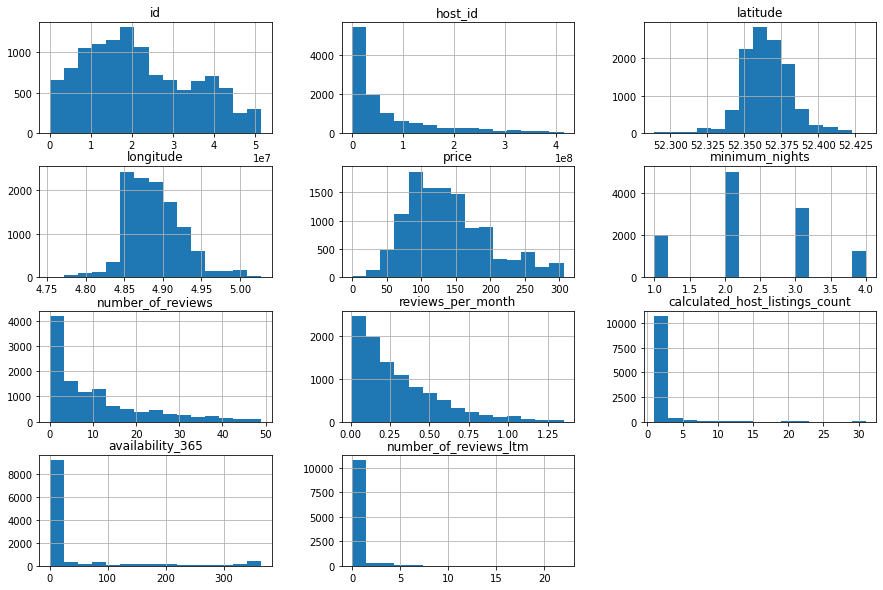

In [18]:
#plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Vimos que a distribuição dos valores esta muito mais equilibrada.
Por comparação vamos visualizar como estava os histogramas sem a removação dos outliers e das variáveis `neighbourhood_group` e `license` que apresentava muito ou total valores ausentes.

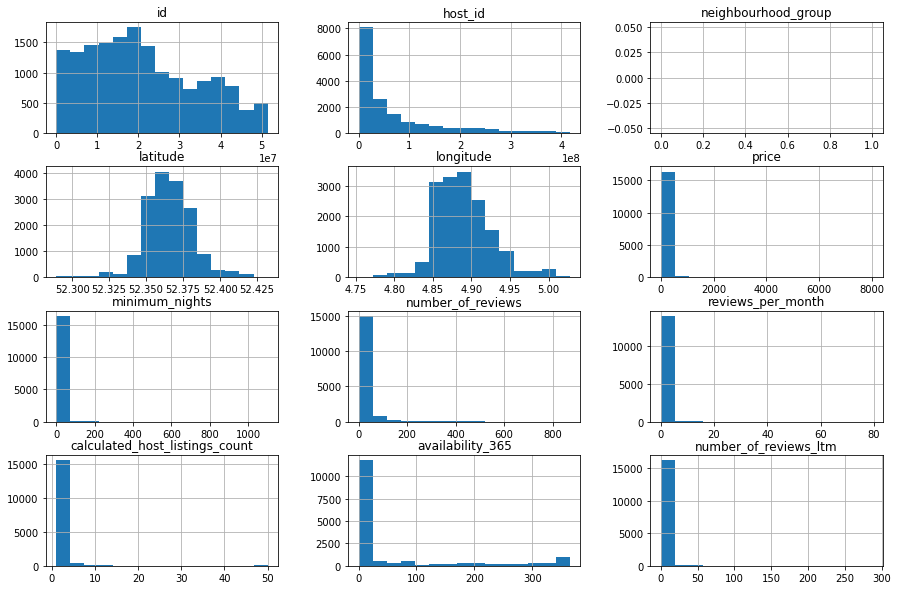

In [19]:
#plotar o histograma para as variáveis numéricas antes das remoções
df.hist(bins=15, figsize=(15,10));


Histogramas comparados, vamos identificar quantas entradas foram necessárias ser removidas, vamos criar boxsplots para essas variáveis.

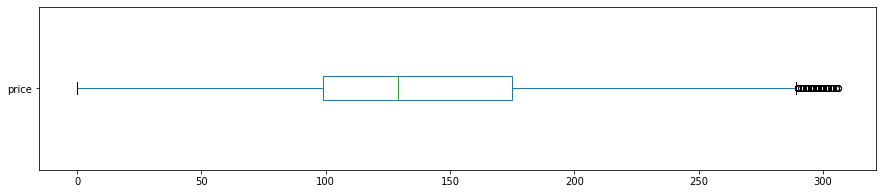


price: valores acima de 306
890 entradas
Representam 5.4011%


In [20]:
# boxsplot da variável price
df_clean.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

print("\nprice: valores acima de 306")
print("{} entradas".format(len(df[df.price >306])))
print("Representam {:.4f}%".format((len(df[df.price >306]) / df.shape[0])*100))

Foi necessária a remoção de **890 entradas** para remover os outliers da variável `price`.

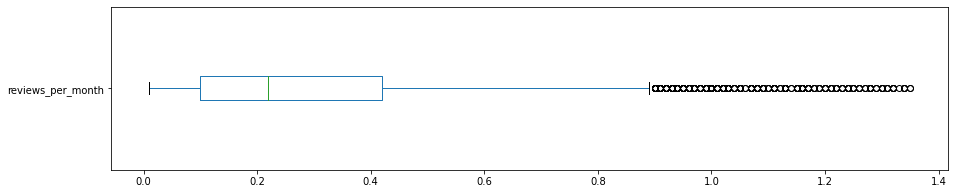


reviews_per_month: valores acima de 1.35
1518 entradas
Representam 9.2123%


In [21]:
# boxsplot da variável reviews_per_month
df_clean.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

print("\nreviews_per_month: valores acima de 1.35")
print("{} entradas".format(len(df[df.reviews_per_month >1.35])))
print("Representam {:.4f}%".format((len(df[df.reviews_per_month >1.35]) / df.shape[0])*100))

Foi necessária a remoção de **1518 entradas** para remover os outliers da variável `reviews_per_month`.

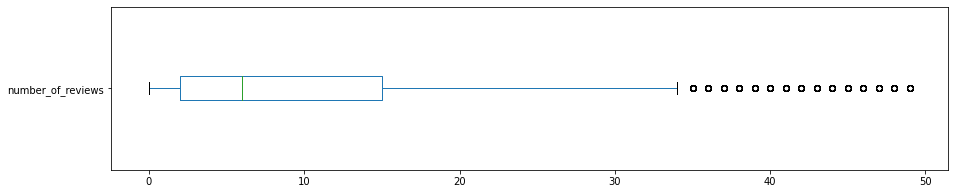


number_of_reviews: valores acima de 49.5
1768 entradas
Representam 10.7295%


In [22]:
# boxsplot da variável number_of_reviews
df_clean.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

print("\nnumber_of_reviews: valores acima de 49.5")
print("{} entradas".format(len(df[df.number_of_reviews >49.5])))
print("Representam {:.4f}%".format((len(df[df.number_of_reviews >49.5]) / df.shape[0])*100))

Foi necessária a remoção de **1768 entradas** para remover os outliers da variável `number_of_reviews`.

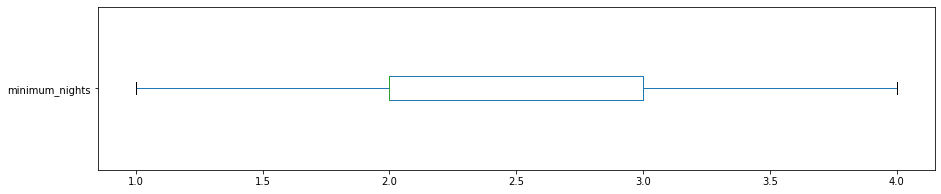


minimum_nights: valores acima de 4.5
2248 entradas
Representam 13.6424%


In [23]:
# boxsplot da variável minimum_nights
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

print("\nminimum_nights: valores acima de 4.5")
print("{} entradas".format(len(df[df.minimum_nights >4.5])))
print("Representam {:.4f}%".format((len(df[df.minimum_nights >4.5]) / df.shape[0])*100))

Foi necessária a remoção de **2248 entradas** para remover os outliers da variável `minimum_nights`.

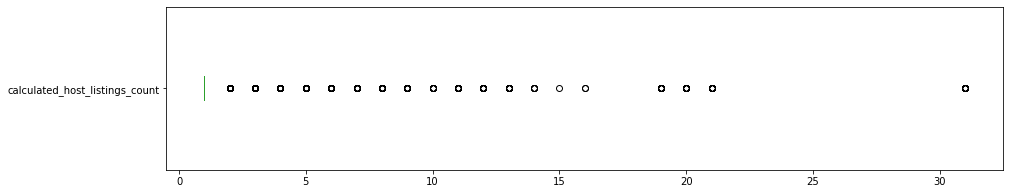


calculated_host_listings_count: valores acima de 50
50 entradas
Representam 0.3034%


In [24]:
# boxsplot da variável calculated_host_listings_count
df_clean.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

print("\ncalculated_host_listings_count: valores acima de 50")
print("{} entradas".format(len(df[df.calculated_host_listings_count == 50])))
print("Representam {:.4f}%".format((len(df[df.calculated_host_listings_count == 50]) / df.shape[0])*100))

Foi necessária a remoção de **50 entradas** para remover os outliers da variável `calculated_host_listings_count`.

APENAS UMA OBSERVAÇÃO: Não necessáriamente removemos a soma dessas entradas, possívelmente muitas delas pertenciam há mais de um, dois ou mais outliers.

### **Q4. Qual a média dos preços de aluguel?**

In [25]:
# ver a média da coluna price
df_clean.price.mean()

139.14904347826086

Como podemos ver acima, a média do preço do aluguel em Amsterdã é de 139,1 Euros.

### **Q5. Qual a correlação existente entre as variáveis**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um `heatmap` a partir dessa matriz, usando a biblioteca Seaborn

In [26]:
# criar uma matriz de correlação
cor = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'availability_365','calculated_host_listings_count']].corr()

display(cor)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count
price,1.000000,0.140476,0.046382,0.041044,0.128130,-0.032720
minimum_nights,0.140476,1.000000,0.075291,-0.053040,-0.090458,-0.129372
number_of_reviews,0.046382,0.075291,1.000000,0.721335,0.048528,-0.032959
reviews_per_month,0.041044,-0.053040,0.721335,1.000000,0.218426,0.088355
availability_365,0.128130,-0.090458,0.048528,0.218426,1.000000,0.190925
calculated_host_listings_count,-0.032720,-0.129372,-0.032959,0.088355,0.190925,1.000000


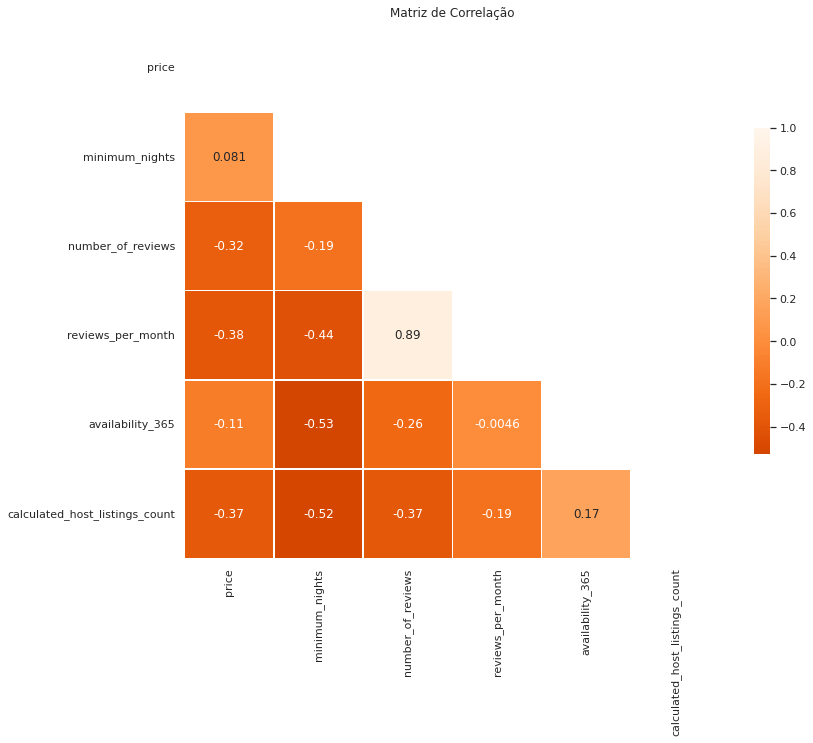

In [27]:
sns.set(style="white")

# Criando uma matriz correlação
corr = cor.corr()

# Criando uma máscara para nossa matriz correlação
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Definindo o tamanho da figura
f, ax = plt.subplots(figsize=(12,10))

# Gerando um diverging colormap
sns.diverging_palette(50,10, as_cmap=True)

# Criando o heatmap com a máscara
sns.heatmap(corr, mask=mask ,annot=True, cmap='Oranges_r', vmax=1, center=0, square=True, 
            linewidth=.5, cbar_kws={'shrink': .6})
ax.set_title('Matriz de Correlação')
plt.savefig('matriz_correlação.png')

Podemos verificar Headmap acima, que há uma correlação maior entre as variáveis `number_of_reviews` e `reviews_per_month`, dentro de uma nota `1.00` a correlação deles é de `0.89`.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se sabe que existem opções de casas/apartamentos, Hotel, apenas aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Contaremos a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [28]:
# somar tipos de imóveis disponíveis
df_clean.room_type.value_counts().sum()

11500

In [29]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9325
Private room       2084
Hotel room           65
Shared room          26
Name: room_type, dtype: int64

O imóvel mais disponível em Amsterdã é **Home/apt** (Casas/Apartamentos) com **9325 opções**, na segunda colocação aparece o tipo **Private Room** (Quarto Privado) com **2084 opções**. 

Com um número bem menor aparecem os tipos **Shared room** (Quarto Compartilhado) e  **Hotel Room** (Quarto de Hotel), essas opções aparecem com números bem distante dos demais.

In [30]:
# mostrar a porcentagem de cada tipo de imóvel alugado
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.565906
Private room       0.126472
Hotel room         0.003945
Shared room        0.001578
Name: room_type, dtype: float64

Acompanhando os números anteriores, aqui identificamos que tipo de imóvel mais alugado em Amsterdã são **home/apt** (Casa/Apartamento) com 56%, **Private Room** (Quarto Privado) vem na sequência com 12%.

**Shared Room** (Quarto Compartilhado) e **Hotel Room** (Quarto de Hotel) aparecem como últimas opções.

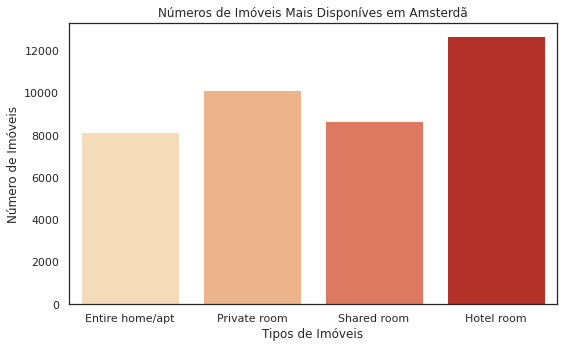

In [41]:
# Plotar gráfico de barras de Imóveis Mais Disponíves em Amsterdã

# definir tamanho e altura
plt.figure(figsize=(8,5))

# Adicionar o Título
plt.title("Números de Imóveis Mais Disponíves em Amsterdã")

# Definir a variável do plot e suas configs
sns.barplot(x=df_clean['room_type'], y=df_clean.index, palette='OrRd', ci=None)

# Adicionar rótulos nos eixos
plt.ylabel("Número de Imóveis")
plt.xlabel("Tipos de Imóveis")

# alinhar rótulos do eixo X na diagonal
#plt.xticks(rotation=0)
plt.tight_layout()


Como vemos acima, temos os números de imóveis dísponiveis em Amsterdã

### **Q7. Qual a localidade mais cara do dataset?**

Uma forma de se verificar uma variável em função da outra é usando `groupby()`. No caso, iremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [32]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-West                158.577646
Centrum-Oost                157.662977
De Pijp - Rivierenbuurt     147.453988
IJburg - Zeeburgereiland    146.239130
Zuid                        144.375309
Westerpark                  140.612487
De Baarsjes - Oud-West      138.473139
Oud-Oost                    138.158537
Watergraafsmeer             134.892857
Buitenveldert - Zuidas      133.301205
Name: price, dtype: float64

Acima vemos que os bairros como **Centrum-Westm** (1º), **Centrum-Oost** (2º) apresentam uma média de preço maior com relação aos demais, provavelmente por estarem mais localizados ao centro da cidade de Amsterdã e onde ficam a maior parte dos pontos turísticos. Vamos ver esses números distribuídos em um gráfico.

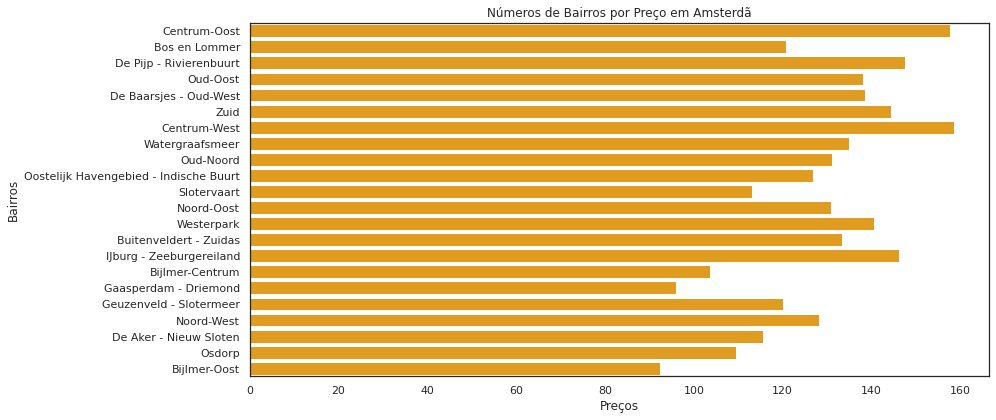

In [33]:
# Plotar gráfico de barras dos bairros por preço
# definir tamanho e altura
plt.figure(figsize=(14,6))

# Definir a variável do plot e suas configs
sns.barplot(x=df_clean['price'].sort_values(ascending=False), y=df_clean['neighbourhood'], color='orange', ci=None)

# Adicionar o Título
plt.title("Números de Bairros por Preço em Amsterdã")

# Adicionar rótulos nos eixos
plt.ylabel("Bairros")
plt.xlabel("Preços")

# alinhar rótulos do eixo X na diagonal
#plt.xticks(rotation=45)

plt.tight_layout()

O gráfico confirma as informações dadas pelo calculo acima, os bairros do centro cidade tem a média de preço mais alta que os demais.

Vamos ver o número de entradas dos três primeiros bairros para ter uma melhor noção disso.


In [34]:
# ver quantidade de imóveis no Centrum-West
print(df_clean[df_clean.neighbourhood == 'Centrum-West'].shape)


(1011, 16)


Para o bairro Centrum-West temos 1011 entradas.

In [35]:
# ver quantidade de imóveis no Centrum-Oost
print(df_clean[df_clean.neighbourhood == 'Centrum-Oost'].shape)

(813, 16)


Para o bairro Centrum-Oost temos 813 entradas.

In [36]:
# ver quantidade de imóveis no IJburg - Zeeburgereiland
print(df_clean[df_clean.neighbourhood == 'De Pijp - Rivierenbuurt'].shape)

(1467, 16)


Para o bairro De Pijp - Rivierenbuurt temos 1467 entradas.

Aqui vemos que que o bairro **De Pijp - Rivierenbuurt** tem 1467 entradas, enquanto os dois primeiros possuem 1011 e 813 respectivamente. Isso nos mostra que apesar de ter mais entradas que os demais, ele fica abaixo na média de preço por bairros.

In [37]:
# ver quantidade de imóveis no Centrum-West
print(df_clean[df_clean.neighbourhood == "Centrum-West"].shape)

# ver as 3 entradas do Centrum-West
df_clean[df_clean.neighbourhood == 'Centrum-West'][:3]

(1011, 16)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
65,219276,Suite in Canalhouse with Jacuzzi,1135329,Amsterdam Boutique Apartments,Centrum-West,52.36891,4.88970,Private room,245,2,10,2020-01-21,0.44,1,352,0
73,254800,Amazing apartment in city center,1337537,Dj,Centrum-West,52.37122,4.88211,Entire home/apt,177,2,49,2019-09-20,1.30,1,328,0
142,462341,Central 17th Century Unique House,2297302,Milen & Joes,Centrum-West,52.37393,4.89355,Entire home/apt,171,4,32,2019-06-11,0.64,1,0,1


Acima, conseguimos visualizar o número de imóveis disponíveis no bairro de *Centrum West* e logo abaixo seus 3 primeiros.

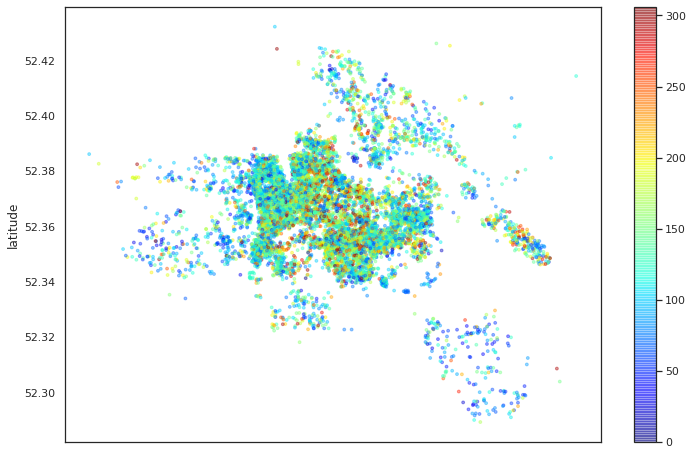

In [38]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Esse **Scatterplot** foi criado, baseado na variáveis de *latitute/longitude* e também na variável *price*, a idéia foi identificar os pontos mais caros e mais baratos da cidade de Amsterdã.
 

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [39]:
# ver a média da coluna minimum_nights
df_clean.minimum_nights.mean()

2.3262608695652176

Aqui vemos que a média de **minimum_nights** (mínimo de noites) alugadas em Amsterdã são de 2.3 noites. Agora vamos ver através de um gráfico de barra, como esses números de mínimos de noites são distribuídos.

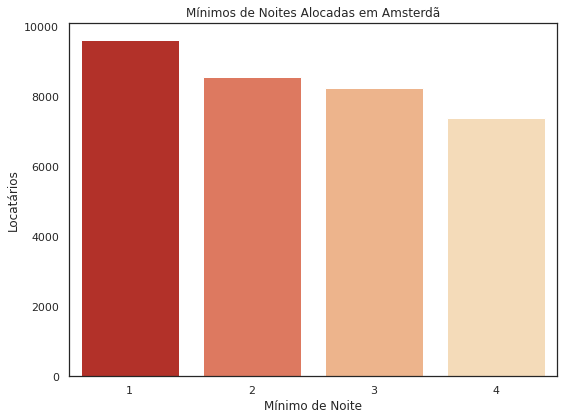

In [40]:
# plotar gráfico de mínimo de noite

# definir tamanho e altura
plt.figure(figsize=(8,6))

# Definir a variável do plot e suas configs
sns.barplot(x=df_clean['minimum_nights'], y=df_clean.index, palette='OrRd_r' , ci=None)

# Adicionar o Título
plt.title("Mínimos de Noites Alocadas em Amsterdã")

# Adicionar rótulos nos eixos
plt.ylabel("Locatários")
plt.xlabel("Mínimo de Noite")

# alinhar rótulos do eixo X na diagonal
#plt.xticks(rotation=45)

plt.tight_layout()

Como vemos acima, o mínimo de uma noite fica em primeiro lugar em Amsterdã, são quase 10 mil locações por apenas uma noite.

Na segunda posição vem o mínimo de duas noites, com mais de 8 mil locações.

Na sequência vem o mínimo de três noites, com um número parecido, que no caso é um pouco inferior ao número da segunda posição.

E por último vem o número de mínimos de 4 noites, com um número um pouco abaixo ao de 8 mil locações.

###**CONCLUSÃO**

Apesar de ter usarmos a versão resumida do dataset do Airbnb, foi possível extrair bastante conhecimento, é uma ótima opção para uma análise mais basica dos dados.

Mas como em todo dataset foi necessário executarmos uma limpeza no mesmo, removendo outliers e colunas que julgamos necessário para otimização de nossa análise.

E o resultado ficou muito bom, conseguimos saber quais são os bairros mais buscados pelos turistas, qual sua média de preço, quais alocações mais disponíveis no aplicativo dentro da cidade, plotamos uma mapa baseado na latitude e longitude fornecida, para saber quais são os lugares mais caros e mais baratos da cidade, também descobrimos qual a média de mínimo de noites alugadas pelos turistas e outras coisas mais...

A idéia desse notebook foi trabalhar tecnicmanente para gerar conhecimento, mostrar que com poucos dados é possível colher bastante informação e muitas delas bem relevantes. Obrigado!